In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
table = pd.read_csv('C:/Users/nisha/Documents/DATA HMP/BRFSS/datatab.csv')

**Q1)The second objective is to understand and explore the idea of comorbidity, which is defined as the simultaneous existence of two or more health conditions**

i.	Sum all eight health conditions together and create a score from 0 to 8 indicating the presence of these conditions. 

In [6]:
table.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5021,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,9,1,2112016,2,11,2016,1200,2016000001,2016000001,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,9,2,3222016,3,22,2016,1200,2016000002,2016000002,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,9,1,1242016,1,24,2016,1100,2016000003,2016000003,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,9,1,1222016,1,22,2016,1100,2016000004,2016000004,1.0,...,1.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0
4,9,1,1222016,1,22,2016,1100,2016000005,2016000005,1.0,...,2.0,NaN,NaN,2.0,1.0,2.0,NaN,2.0,1.0,2.0
5,9,1,1282016,1,28,2016,1100,2016000006,2016000006,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0
6,9,1,1242016,1,24,2016,1100,2016000007,2016000007,1.0,...,NaN,NaN,9.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0
7,9,1,1242016,1,24,2016,1100,2016000008,2016000008,1.0,...,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,9,1,1222016,1,22,2016,1100,2016000009,2016000009,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,9,1,1252016,1,25,2016,1100,2016000010,2016000010,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [16]:
#creating a set of new columns for each of the comorbidities which denote that the condition is present for that 
#particular population
table['DIABETES'] = np.where(table['DIABETE3'] == 1, 1, 0)
table['ASTHMA'] = np.where(table['ASTHMA3'] == 1, 1, 0)
table['COPD'] = np.where(table['CHCCOPD1'] == 1, 1, 0)
table['CANCER'] = np.where((table['CHCSCNCR'] == 1) | (table['CHCOCNCR'] == 1) , 1, 0) 
table['HEART'] = np.where((table['CVDCRHD4'] == 1) | (table['CVDINFR4'] == 1) | (table['CVDSTRK3'] == 1), 1, 0)
table['DEPRESSION'] = np.where(table['ADDEPEV2'] == 1, 1, 0)
table['ARTHRITIS'] = np.where(table['HAVARTH3'] == 1, 1, 0)
table['KIDNEY'] = np.where(table['CHCKIDNY'] == 1, 1, 0)

In [18]:
#creating a cumulative score for those with the condition above
table['SCORE1'] = table['DIABETES']+table['ASTHMA']+table['COPD']+table['CANCER']+table['HEART']+table['DEPRESSION']+table['ARTHRITIS']+table['KIDNEY']

In [19]:
table.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_AIDTST3,DIABETES,ASTHMA,COPD,CANCER,HEART,DEPRESSION,ARTHRITIS,KIDNEY,SCORE1
0,9,1,2112016,2,11,2016,1200,2016000001,2016000001,NaN,...,1.0,0,0,0,0,0,0,0,0,0
1,9,2,3222016,3,22,2016,1200,2016000002,2016000002,NaN,...,2.0,0,0,0,0,0,0,0,0,0
2,9,1,1242016,1,24,2016,1100,2016000003,2016000003,1.0,...,2.0,1,1,1,1,0,1,1,0,6
3,9,1,1222016,1,22,2016,1100,2016000004,2016000004,1.0,...,2.0,0,0,0,0,0,0,0,0,0
4,9,1,1222016,1,22,2016,1100,2016000005,2016000005,1.0,...,2.0,0,0,0,1,1,0,0,0,2
5,9,1,1282016,1,28,2016,1100,2016000006,2016000006,1.0,...,2.0,0,0,0,0,0,1,1,0,2
6,9,1,1242016,1,24,2016,1100,2016000007,2016000007,1.0,...,2.0,1,0,0,0,0,0,0,0,1
7,9,1,1242016,1,24,2016,1100,2016000008,2016000008,1.0,...,2.0,0,1,0,0,0,0,0,0,1
8,9,1,1222016,1,22,2016,1100,2016000009,2016000009,1.0,...,2.0,0,0,0,0,0,0,0,0,0
9,9,1,1252016,1,25,2016,1100,2016000010,2016000010,1.0,...,9.0,0,0,0,0,0,0,0,0,0


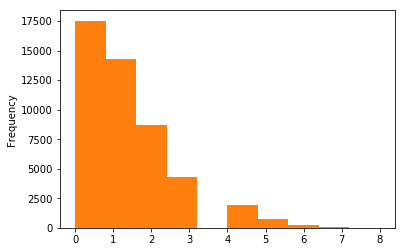

In [26]:
#distribution of the population, 0 denotes the population is healthy with zero comorbidities and lesser people with
#increasing number of comorbidities
table['SCORE1'].plot(kind = 'hist')
plt.show()

ii.	The above score assumes equality of health conditions together. The score tries to create differentiation based on the severity of health conditions. Create a weighted comorbidity score based on the following weights

In [20]:
#creating different columns with the weightage system defined for some chronic diseases
table['DIABETES_WT'] = np.where(table['DIABETES'] == 1, 0.220, 0)
table['ASTHMA_WT'] = np.where(table['ASTHMA'] == 1, 0.050, 0)
table['COPD_WT'] = np.where(table['COPD'] == 1, 0.028, 0)
table['CANCER_WT'] = np.where(table['CANCER'] == 1 , 0.154, 0) 
table['HEART_WT'] = np.where(table['HEART'] == 1, 0.347, 0)
table['DEPRESSION_WT'] = np.where(table['DEPRESSION'] == 1, 0.099, 0)
table['ARTHRITIS_WT'] = np.where(table['HAVARTH3'] == 1, 0.072, 0)
table['KIDNEY_WT'] = np.where(table['CHCKIDNY'] == 1, 0.03, 0)

In [21]:
#cumulative score of the above weightages
table['SCORE2'] = table['DIABETES_WT']+table['ASTHMA_WT']+table['COPD_WT']+table['CANCER_WT']+table['HEART_WT']+table['DEPRESSION_WT']+table['ARTHRITIS_WT']+table['KIDNEY_WT']

In [22]:
table.head(5)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,SCORE1,DIABETES_WT,ASTHMA_WT,COPD_WT,CANCER_WT,HEART_WT,DEPRESSION_WT,ARTHRITIS_WT,KIDNEY_WT,SCORE2
0,9,1,2112016,2,11,2016,1200,2016000001,2016000001,NaN,...,0,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000
1,9,2,3222016,3,22,2016,1200,2016000002,2016000002,NaN,...,0,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000
2,9,1,1242016,1,24,2016,1100,2016000003,2016000003,1.0,...,6,0.22,0.05,0.028,0.154,0.000,0.099,0.072,0.0,0.623
3,9,1,1222016,1,22,2016,1100,2016000004,2016000004,1.0,...,0,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000
4,9,1,1222016,1,22,2016,1100,2016000005,2016000005,1.0,...,2,0.00,0.00,0.000,0.154,0.347,0.000,0.000,0.0,0.501


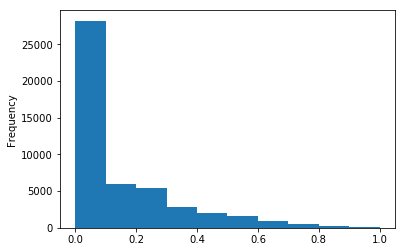

In [27]:
table['SCORE2'].plot(kind = 'hist')
plt.show()

Analyze the weight variable _LLCPWT on basic descriptive statistics (for NH only), by various categories like _STSTR, Sex, Age, and Income.

In [48]:
table_wt = table[table['_STATE']==33]

In [60]:
y=table_wt['_LLCPWT']
x=table_wt['_STSTR']

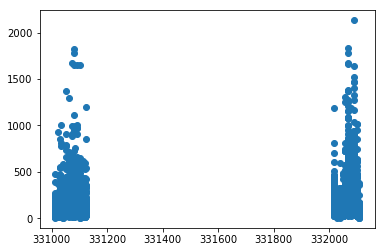

In [61]:
plt.scatter(x,y)
plt.show()

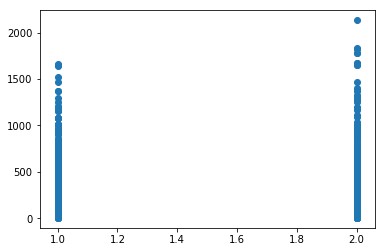

In [62]:
a=table_wt['SEX']
b=table_wt['_LLCPWT']
plt.scatter(a,b)
plt.show()

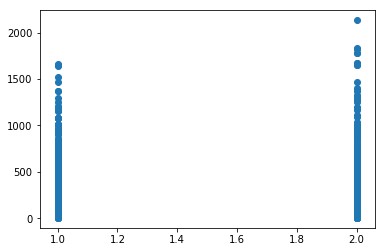

In [64]:
c=table_wt['SEX']
d=table_wt['_LLCPWT']
plt.scatter(c,d)
plt.show()

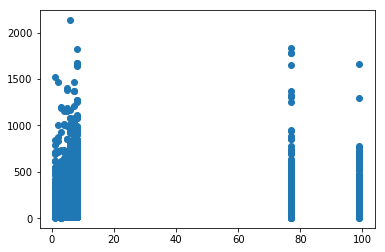

In [65]:
e=tableus['INCOME2']
f=table_wt['_LLCPWT']
plt.scatter(e,f)
plt.show()